<a href="https://colab.research.google.com/github/vanessa-nascimento/inteligencia-artificial/blob/main/Criando_um_Perceptron_Simples_Intelig%C3%AAncia_Artificial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementando um Perceptron Simples

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

df.tail()

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

X = df.iloc[0:100, [0, 2]].values

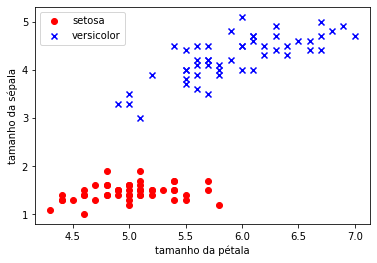

In [ ]:
#o que eu quero que meu perceptron aprenda

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')

plt.xlabel('tamanho da pétala')
plt.ylabel('tamanho da sépala')

plt.legend(loc='upper left')
plt.show()

In [ ]:
class Perceptron:
  def __init__(self, taxaApredizado=0.001, epocas=10):
    self.taxaApredizado = taxaApredizado
    self.epocas = epocas
  
  def treinamento(self, entradas, rotulos):
    self.pesos_ = np.zeros(1 + entradas.shape[1])
    self.erros_ = []

    for _ in range(self.epocas):
      erros = 0

      for entrada, rotulo in zip(entradas, rotulos):
        atual = self.taxaApredizado * (rotulo - self.ativacao(entrada))
        self.pesos_[1:] += atual * entrada
        self.pesos_[0] += atual
        erros += int(atual != 0.0)
      self.erros_.append(erros)

  def ativacao(self, entrada):
    return np.where(self.agregadora(entrada) >= 0.0, 1, -1)
  def agregadora(self, entrada):
    return np.dot(entrada, self.pesos_[1:]) + self.pesos_[0]

In [ ]:
#passei os dados das flores para o perceptron
ppn = Perceptron(taxaApredizado=0.1, epocas=10)
ppn.treinamento(X,y)

In [ ]:
def plot_decision_regions(X, y, classificador, resolucao=0.02):
  markers = ('s', 'x', 'o', 'ˆ', 'v')
  colors = ('red', 'blue', 'lightgreen', 'grey', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolucao), np.arange(x2_min, x2_max, resolucao))

  Z = classificador.ativacao(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.4, cmap = cmap)

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


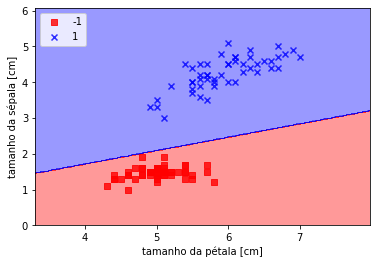

In [ ]:
plot_decision_regions(X, y, ppn)
plt.xlabel('tamanho da pétala [cm]')
plt.ylabel('tamanho da sépala [cm]')

plt.legend(loc='upper left')
plt.show()

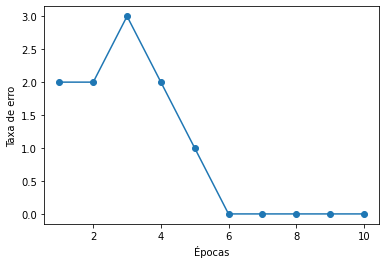

In [ ]:
#taxa de erro
plt.plot(range(1, len(ppn.erros_) + 1), ppn.erros_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Taxa de erro')

plt.show()